# Sect 20 (v2.1): Extensions to Linear Models

- online-ds-pt-100719
- 02/27/2020


## Objectives

**DISCUSSION:**
- Discuss interactions between variables
- Discuss polynomial regressions
- Discuss the Bias vs Variance trade-off



**APPLICATION:**
- [Sect 20: Interactions Lab](https://learn.co/tracks/module-2-data-science-career-2-1/statistics-ab-testing-and-linear-regression/section-20-extensions-to-linear-models/interactions-lab)
 

- [Sect 20: Polynomial Regression Lab](https://github.com/learn-co-students/dsc-polynomial-regression-lab-online-ds-pt-100719)

## Topics Covered in Section 20


- Interactions
- Polynomial Regression    
- [Bias-Variance Trade Off](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)

# Interactions

## What is an interaction?

When variables interact to **cause an effect** to another variable but is **not the sum of their parts**

> "An interaction is a particular property of two or more variables where they interact in a non-additive manner when affecting a third variable" - *Section recap*

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-interaction-terms-online-ds-pt-100719/master/images/new_diet_image.png">


> In our example, the interaction plot was composed out of categorical predictors (countries and diet type), but interactions can occur between categorical variables or between a mix of categorical variables and continuous variables!

### Confounding factor

>This means that the "Country" and "Diet" affect weight loss in a non-additive matter. If we're mostly interested in the effect of diet on weight loss (which seems to be plausible here), we say that "Country" is a **confounding factor** of the effect of "Diet" on weight loss.

![](images/diet_interaction.png)

### Why is important to account for interactions?

- "Not accounting for them might lead to results that are wrong."
- Replacing 2 individual columns with their interaction column can reduce the overall number of features.

- Addressing multicollinearity by creating an interaction variable instead of using the multicollinear ones.


- You'll also notice that including them when they're needed will increase your $R^2$ value!


### When should we use interactions?

- Whenever it can help the model, but not required.
- Can use in hypothesis testing as well (for ANOVAs)

## Using seaborn to view interactions

In [1]:
# !pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.7.8 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


['[i] Pandas .iplot() method activated.']


In [2]:
pd.set_option('display.max_rows',999)
pd.set_option('display.max_columns',0)

plt.style.use('seaborn-notebook')

In [4]:
df = fs.datasets.load_autompg()
# display(df.head(),df.dtypes)
df.info()

[i] Source url with details: https://www.kaggle.com/uciml/autompg-dataset


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


https://blog.insightdatascience.com/data-visualization-in-python-advanced-functionality-in-seaborn-20d217f1a9a6

- `sns.factorplot`
- `sns.FacetGrid`

In [ ]:
# # mpl.rcParams['figure.figsize'] = (10,6)
# # fig,ax = plt.subplots()
# ffig = sns.catplot(data=df, x='horsepower',y='mpg',
#                   hue='origin',kind='point',aspect=3,scale=0.6)
# ffig.ax.set_xticklabels(ffig.ax.get_xticklabels(),rotation=45,
#                        ha='right',size=10);

# # display(fs.get_methods_attributes_df(ffig))

In [ ]:
# ffig = sns.catplot(data=df, x='horsepower',y='mpg',
#                   col='origin',kind='point',scale=0.4)


In [ ]:
g = sns.FacetGrid(df,col='origin')
g.map(sns.distplot,"mpg")

In [ ]:
g = sns.FacetGrid(df, col='origin')
g.map(sns.regplot, "horsepower",'mpg',scatter_kws={'s':16})

In [ ]:
# sns.regplot(data=df,x='horsepower',y='mpg')#,color='origin')

# Polynomial Regressions

Remember we started with (multiple) linear equation:

$$ \large \hat{y} = w_0 + w_1  x_1 + w_2  x_2 + ... + w_N  x_N $$
$$ \large \hat{y} = \sum_{n=0}^{N} w_n x_n $$


**Knowledge check:** Why is this "linear"?

## Making it more complex!

In [13]:
df = fs.datasets.load_yields(version='other')
display(df.head())

,Temp,Yield
i,,
1,50,3.3
2,50,2.8
3,50,2.9
4,50,3.2
5,60,2.7


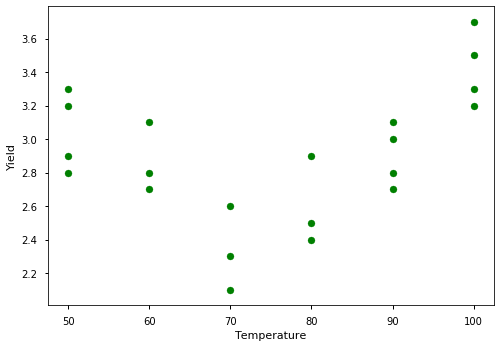

In [14]:
y = df['Yield']

X = df.drop(columns=['Yield'])


plt.scatter(X, y, color='green')
plt.xlabel('Temperature')
plt.ylabel('Yield');

$\large \hat y = \hat \beta_0 + \hat \beta_1x $ 

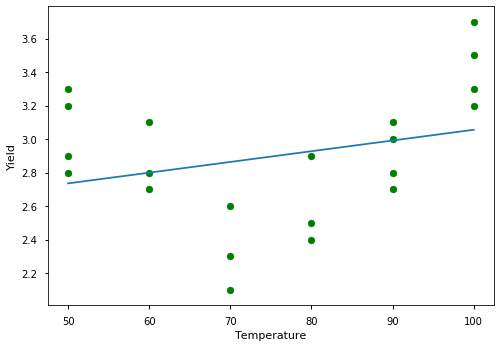

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
plt.scatter(X, y, color='green')
plt.plot(X, reg.predict(X))
plt.xlabel('Temperature')
plt.ylabel('Yield');


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y, reg.predict(X)), r2_score(y, reg.predict(X))

(0.13926747720364746, 0.08605718085106362)

### A quadratic relationship
$\large \hat y = \hat \beta_0 + \hat \beta_1x + \hat \beta_2 x^2$ 

In [17]:
# fig,ax = plt.subplots()
# ax = df.plot(kind='scatter',x='Temp',y='Yield',sizes=[50],ax=ax)
# ax.plot(df['Temp'], reg.predict(df[['Temp']]))

In [18]:
X['Temp_sq'] = X['Temp']**2
X.head()

,Temp,Temp_sq
i,,
1,50,2500
2,50,2500
3,50,2500
4,50,2500
5,60,3600


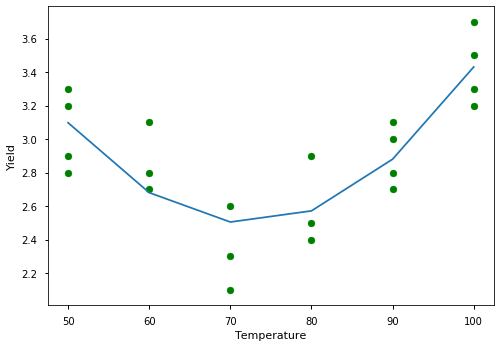

In [19]:
reg_q = LinearRegression().fit(X, y)
plt.scatter(X['Temp'], y, color='green')
plt.plot(X['Temp'], reg_q.predict(X))
plt.xlabel('Temperature')
plt.ylabel('Yield');

In [20]:
mean_squared_error(y, reg_q.predict(X)),r2_score(y, reg_q.predict(X))

(0.04650413890879159, 0.6948165884110552)

In [ ]:
xs = np.linspace(0,100)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

n_poly = 5
def get_poly_features(df,transform_col='Temp',target_col='Yield',
                     n_poly=5):
    polyfeat = PolynomialFeatures(n_poly)
    col_names = [f'{transform_col}^{i}' for i in range(n_poly+1)]

    X_poly = polyfeat.fit_transform(df[[transform_col]])
    df_poly = pd.DataFrame(X_poly,columns=col_names)
    df_poly[target_col] = df[target_col].copy()
    df_poly.dropna(inplace=True)
    return df_poly

Imagine making this (start with just one variable):

$$ \large \hat{y} = \beta_0 + \beta_1  x + \beta_2  x^2 + ... + \beta_N  x^N $$
$$ \large \hat{y} = \sum_{n=0}^{N} \beta_n x^n $$

In [ ]:
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def model_poly_data(df_poly,n_poly=5, fig_xcol='Temp^1',target_col='Yield'):

    X = df_poly.drop(columns=[target_col]).copy()
    y = df_poly[target_col].copy()
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=123)
    poly_reg = LinearRegression()#normalize=True)
    poly_reg.fit(X_train,y_train)
    
    y_hat_train =  poly_reg.predict(X_train)
    y_hat_test =  poly_reg.predict(X_test)
    
    r2_train = r2_score(y_train, y_hat_train)
    r2_test = r2_score(y_test,y_hat_test)
    
    print(f'[i] For polynomial features = {n_poly}:')
    print(f"\tTraining R2: {round(r2_train,4)}")
    print(f"\tTest R2: {round(r2_test,4)}")
    
    fig,ax = plt.subplots()
    df_poly.plot(kind='scatter',x=fig_xcol,y=target_col,sizes=[50],ax=ax)
    ax.plot(df_poly[fig_xcol], poly_reg.predict(X))
    
    plot_r2 = r2_score(y, poly_reg.predict(X))
    ax.set_title(f"Predictions From Poly={n_poly}: R2={round(plot_r2,3)}")
#     plt.scatter(X_test[fig_xcol], y_test)
#     plt.plot(X_test[fig_xcol],y_hat_test)
    return {'train_test_split': [X_train,X_test,y_train,y_test],
           'preds': {'train':y_hat_train,
                    'test':y_hat_test}}


# # def plot_poly():
#     fig,ax = plt.subplots()
#     df_poly.plot(kind='scatter',x=orig_data_col,y=target_col,sizes=[50],ax=ax)
    
#     ax.plot(df_poly[orig_data_col], preds)
    
#     ax.set_title(f"Predictions From Poly={n_poly}: R2={round(r2,3)}")
#     return fig,ax

from ipywidgets import interact

@interact
def show_poly_results(N=(1,10)):
# N =3

    df_poly = get_poly_features(df,n_poly=N,transform_col='Temp',target_col='Yield',)
#     display(df_poly.head())

    res=model_poly_data(df_poly,n_poly=N)
    # plot_poly()

In [ ]:


n_polys = [2,3,4,6,8,10]
for n in n_polys:
    kws = dict(n_poly=n)
    df_poly = get_poly_features(df,**kws)
    res = model_poly_data(df_poly,**kws)
    

In [ ]:
#     res[]
res['train_test_split']
#     model_and_plot_poly(df_poly,**kws)

![](https://github.com/learn-co-students/dsc-2-24-05-polynomial-regression-online-ds-sp-000/raw/master/index_files/index_23_0.png)

![](https://github.com/learn-co-students/dsc-2-24-05-polynomial-regression-online-ds-sp-000/raw/master/index_files/index_28_0.png)

For more general (multiple variables):

$$ \large \hat{y} = \beta_{0,0} + \sum_{i=0}^{N} \beta_{1,i} x_1^i + \sum_{i=0}^{N} \beta_{2,i} x_2^i + ... + \sum_{i=0}^{N} \beta_{M,i} x_M^i$$ 

$$ \large \hat{y} = \sum_{i=0}^{N}\sum_{j=0}^{M} \beta_{j,i} x_j^i $$ 


# Bias-Variance Trade Off

## Underfitting and Overfitting

Let's formalize this:


> *Underfitting* happens when a model cannot learn the training data, nor can it generalize to new data.

The simple linear regression model fitted earlier was an underfit model.

> *Overfitting* happens when a model learns the training data too well. In fact, so well that it is not generalizeable to new data 

## The Bias-Variance Trade Off


Another perspective on this problem of overfitting versus underfitting is the bias-variance tradeoff. 

We can break down our error term (the mean squared error) as the sum of 3 sources of error: 

- *bias*
- *variance*, and
- *irreducible error* 

 

$$ \large \text{MSE} = \text{Bias}(\hat{f}(x))^2 + \text{Var}(\hat{f}(x)) + \sigma^2$$
- The derivation of this can be found [here](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff#Derivation).

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-bias-variance-trade-off-online-ds-pt-100719/master/images/new_bias_variance.png">


- **Bias** arises when wrong assumptions are made when training a model. For example:

    - An interaction effect is missed, 
    - We missed a certain polynomial relationship. 
    
    - Because of this, our algorithm misses the relevant relations between predictors and the target variable.
    - *(Note how this is similar to underfitting!)*


- **Variance** arises  when a model is too sensitive to small fluctuations in the training set. 

    - When variance is high, random noise is modeled instead of the intended outputs. 
    - *(This is overfitting!)*

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/bias_variance_optimize.png">


> **The balance between bias and variance is a trade-off.** We can reduce the variance but then there is a risk of running a bigger bias, and vice versa. 
- Bias is usually associated with low model complexity, variance with high model complexity.
- There is generally a "sweet spot" in-between, compromising between bias and variance.


